# Análise Exploratória Infrações de Trânsito em Viamão no 1º Trimestre 2024

Estudo exploratório com o objetivo de gerar uma visualização com as infrações mais cometidas no município de Viamão em 2024 e um comparativo com a média do restante do estado.

Fonte de Dados: DETRAN-RS https://dados.rs.gov.br/organization/detranrs - Atualizado em 18 de Abril de 2024, 17:52

Lista de Infrações: GOV.BR https://www.gov.br

População: IBGE https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html

Eu realizei um processo de ETL (Extração, Transformação e Carregamento) de dados durante minha análise de infrações de trânsito em Viamão. Primeiro, extraí os dados brutos da tabela disponível no site do Detran RS. Depois, abri esses dados no Excel para iniciar a transformação.

Na etapa de transformação, substituí os artigos da lei pelos seus respectivos descrições para facilitar a compreensão dos dados. Também removi um campo chamado "RS" que continha os totais, pois não era relevante para minha análise.

Esse trabalho incluiu a limpeza dos dados, garantindo que eles estivessem corretos, completos e livres de informações irrelevantes. A última etapa do processo ETL é carregar os dados transformados aqui na plataforma para realizar as análises.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo Excel
df = pd.read_excel('infracoes_detransrs_2024_estruturado.xlsx')

# Exibir as primeiras linhas do dataframe para verificar a estrutura
pd.set_option('display.max_columns', None)
print(df.head())

       CIDADE  Realizar obras ou eventos na via sem autorização.  \
0      ACEGUA                                                  0   
1  AGUA SANTA                                                  0   
2       AGUDO                                                  0   
3   AJURICABA                                                  0   
4     ALECRIM                                                  0   

   Dirigir sem possuir CNH, com CNH cassada, ou suspensa.  \
0                                                 10        
1                                                  5        
2                                                 64        
3                                                 22        
4                                                 11        

   Entregar a direção do veículo a pessoa sem CNH.  \
0                                                1   
1                                                0   
2                                                2   
3       

In [2]:
pd.set_option('display.max_columns', None)
estatisticas_basica = df.describe()
print(estatisticas_basica)

       Realizar obras ou eventos na via sem autorização.  \
count                                         489.000000   
mean                                            0.002045   
std                                             0.045222   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       Dirigir sem possuir CNH, com CNH cassada, ou suspensa.  \
count                                         489.000000        
mean                                          132.288344        
std                                          2040.361776        
min                                             0.000000        
25%                                             3.000000        
50%                                             9.000000        
75% 

In [3]:
# Filtrar os dados para a cidade de Viamão
viamao_df = df[df['CIDADE'] == 'VIAMAO']

# Calcular o total de infrações para cada tipo em Viamão
viamao_totais = viamao_df.sum(numeric_only=True)

# Exibir as infrações mais comuns em Viamão
pd.set_option('display.max_rows', None)
print(viamao_totais)

Realizar obras ou eventos na via sem autorização.                                                                                                             0
Dirigir sem possuir CNH, com CNH cassada, ou suspensa.                                                                                                      222
Entregar a direção do veículo a pessoa sem CNH.                                                                                                               7
Permitir que pessoa sem CNH dirija o veículo.                                                                                                               134
Dirigir sob a influência de álcool ou outra substância psicoativa.                                                                                           68
Entregar a direção do veículo a pessoa sob influência de álcool ou outra substância psicoativa.                                                               1
Deixar de usar cinto de segurança.      

In [4]:
# Calcular a média de infrações para o estado todo, incluindo Viamão
media_estadual = df.mean(numeric_only=True)


# Comparar as infrações de Viamão com a média do estado
comparacao = pd.DataFrame({
    'Viamão': viamao_totais,
    'Média Estadual': media_estadual
})

# Exibir a comparação
pd.set_option('display.max_rows', None)
print(comparacao)

                                                    Viamão  Média Estadual
Realizar obras ou eventos na via sem autorização.        0        0.002045
Dirigir sem possuir CNH, com CNH cassada, ou su...     222      132.288344
Entregar a direção do veículo a pessoa sem CNH.          7        3.725971
Permitir que pessoa sem CNH dirija o veículo.          134       23.570552
Dirigir sob a influência de álcool ou outra sub...      68       16.079755
Entregar a direção do veículo a pessoa sob infl...       1        0.233129
Deixar de usar cinto de segurança.                     777       88.028630
Transportar criança sem observar as normas de s...      33        8.092025
Dirigir sem atenção ou sem os cuidados indispen...      15        3.000000
Dirigir ameaçando os pedestres ou outros veículos.       5        0.803681
Utilizar o veículo para arremessar, sobre os pe...       0        0.032720
Atirar do veículo ou abandonar na via objetos o...       1        0.327198
Disputar corrida (racha).

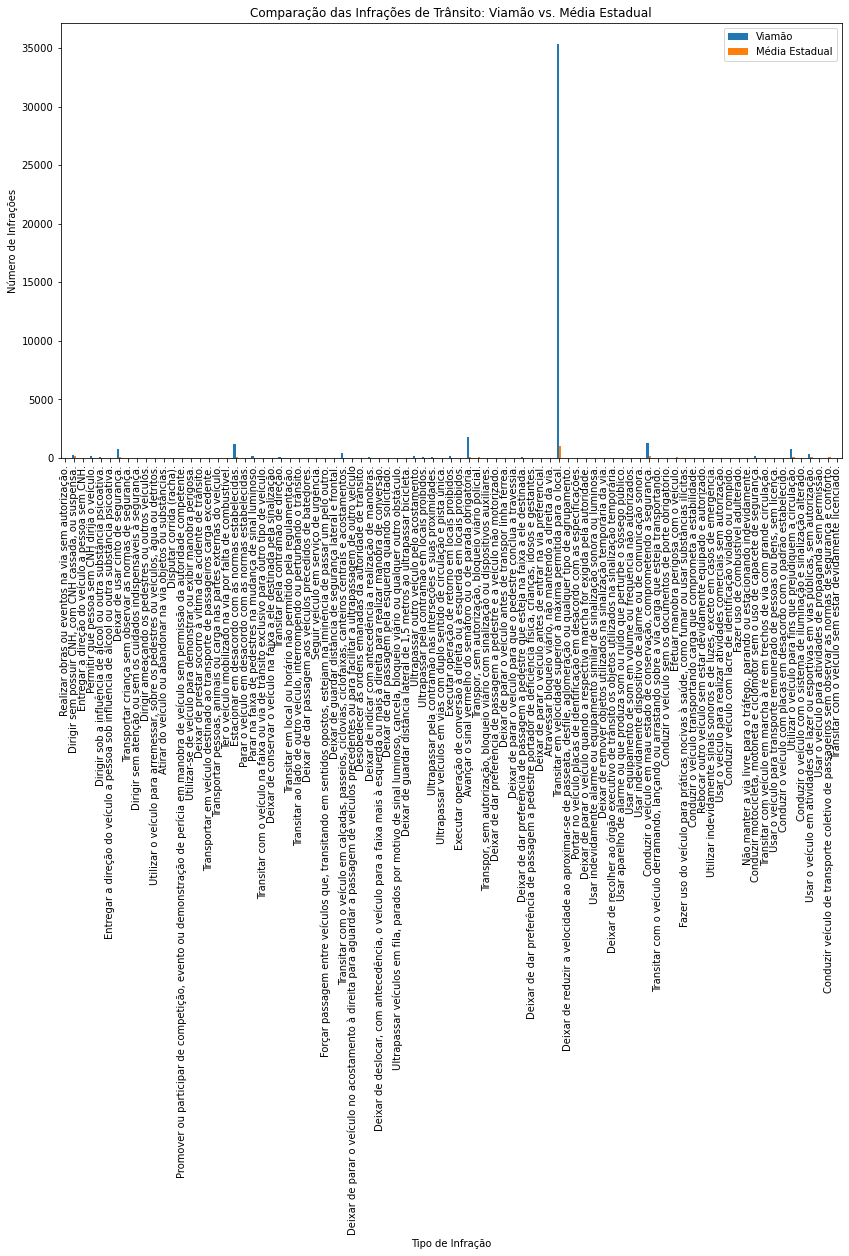

In [5]:
# Plotar um gráfico de barras comparando Viamão com a média do estado
comparacao.plot(kind='bar', figsize=(14, 8))
plt.title('Comparação das Infrações de Trânsito: Viamão vs. Média Estadual')
plt.ylabel('Número de Infrações')
plt.xlabel('Tipo de Infração')
plt.xticks(rotation=90)
plt.show()

In [7]:
# Filtrar os dados para a cidade de Viamão
viamao_df = df[df['CIDADE'] == 'VIAMAO']

# Calcular o total de infrações para cada tipo em Viamão
viamao_totais = viamao_df.sum(numeric_only=True)

# Ordenar as infrações em ordem decrescente
viamao_ranking = viamao_totais.sort_values(ascending=False)

# Exibir o ranking das infrações mais cometidas em Viamão
print(viamao_ranking)

Transitar em velocidade superior à máxima permitida para o local.                                                                                         35366
Avançar o sinal vermelho do semáforo ou o de parada obrigatória.                                                                                           1760
Conduzir o veículo em mau estado de conservação, comprometendo a segurança.                                                                                1293
Estacionar em desacordo com as normas estabelecidas.                                                                                                       1211
Deixar de usar cinto de segurança.                                                                                                                          777
Utilizar o veículo para fins que prejudiquem a circulação.                                                                                                  745
Transitar com o veículo em calçadas, pas

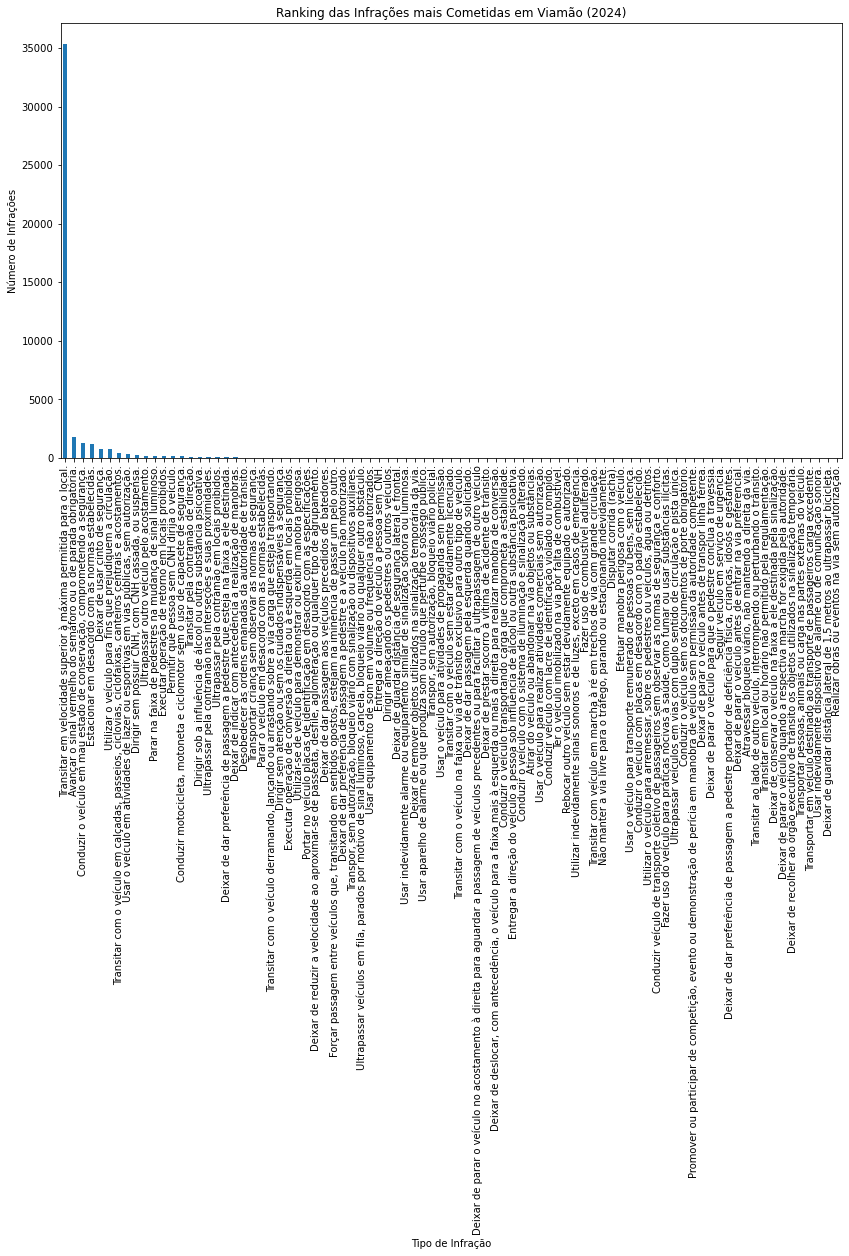

In [8]:
import matplotlib.pyplot as plt

# Plotar o ranking das infrações mais cometidas em Viamão
viamao_ranking.plot(kind='bar', figsize=(14, 8))
plt.title('Ranking das Infrações mais Cometidas em Viamão (2024)')
plt.ylabel('Número de Infrações')
plt.xlabel('Tipo de Infração')
plt.xticks(rotation=90)
plt.show()

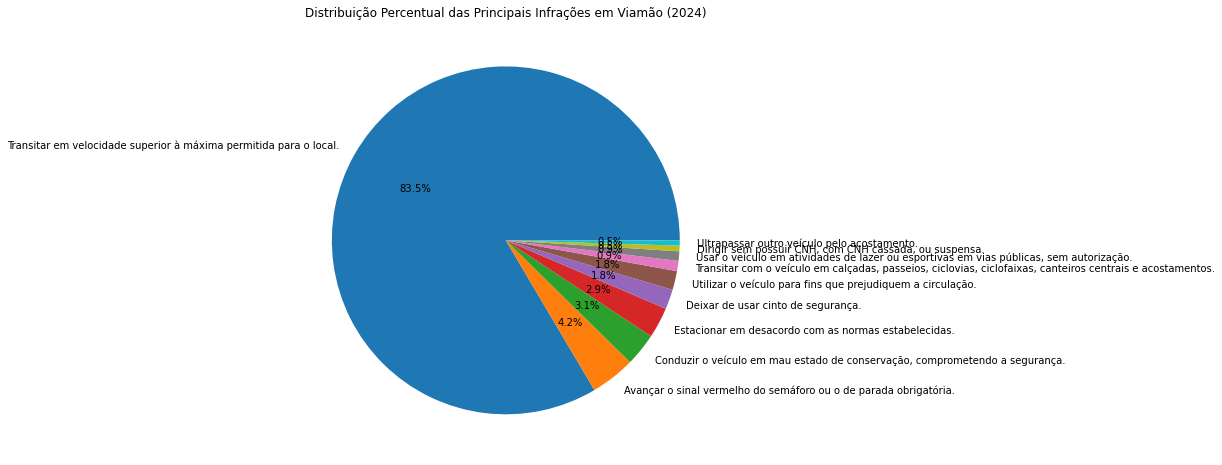

In [9]:
# Plotar a distribuição percentual das principais infrações em Viamão
viamao_ranking.head(10).plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title('Distribuição Percentual das Principais Infrações em Viamão (2024)')
plt.ylabel('')
plt.show()

Há muitas discrepâncias ao comparar os dados de Viamão com os do restante do estado. O município é atravessado por uma rodovia estadual que dá acesso à praia, o que poderia justificar algum aumento no 1º Trimestre, entretanto não justifica tamanha diferença, é necessário mais dados para seguir a pesquisa. Talvez trabalhar com uma taxa de infrações por 1000 habitantes possa ser mais relevante para comparativos.

Acrescentei uma coluna População (com dados obtidos no IBGE) pelo Excel, agora devo calcular as infrações para cada 1000 habitantes, afim de conseguir comparar os dados de Viamão. Também vamos exportar esses dados para criar uma visualização de dados fora do Jupyter.

In [10]:
# Carregar a planilha com população
dados_atualizados = 'infracoes_detransrs_2024_estruturado_populacao.xlsx'
df = pd.read_excel(dados_atualizados)

In [11]:
# Listar todas as colunas de infrações para calcular por 1000 habitantes
colunas_infracoes = df.columns[1:-1]  # Todas as colunas menos a primeira (CIDADE) e a última (População)

# Calcular as infrações por 1000 habitantes
for col in colunas_infracoes:
    df[col] = (df[col] / df['População']) * 1000

# Exportar a nova tabela
export_path = 'infracoes_detranrs_2024_por_1000_habitantes.xlsx'
df.to_excel(export_path, index=False)

In [12]:
# Filtrar dados de Viamão
viamao_dados = df[df['CIDADE'].str.upper() == 'VIAMAO']

# Calcular as médias de todas as cidades (incluindo Viamão)
media_cidades = df[colunas_infracoes].mean()

In [13]:
# Comparativo das infrações de Viamão com as médias do estado
comparativo_viamao_estado = viamao_dados[colunas_infracoes].T
comparativo_viamao_estado.columns = ['VIAMAO']
comparativo_viamao_estado['MEDIA_ESTADO'] = media_cidades
comparativo_viamao_estado['DIFERENCA'] = comparativo_viamao_estado['VIAMAO'] - comparativo_viamao_estado['MEDIA_ESTADO']

In [14]:
# Ranking das infrações mais cometidas em Viamão
ranking_viamao = comparativo_viamao_estado.sort_values(by='VIAMAO', ascending=False)

In [15]:
# Ranking das infrações onde a média de Viamão é maior que a média do estado
viamao_maior_media_estado = comparativo_viamao_estado[comparativo_viamao_estado['DIFERENCA'] > 0].sort_values(by='DIFERENCA', ascending=False)

In [16]:
# Exibir os resultados
from IPython.display import display

print("Comparativo de Viamão com a média do estado:")
display(comparativo_viamao_estado)

print("Ranking das infrações mais cometidas em Viamão:")
display(ranking_viamao)

print("Infrações onde a média de Viamão é maior que a média do estado:")
display(viamao_maior_media_estado)

Comparativo de Viamão com a média do estado:


,VIAMAO,MEDIA_ESTADO,DIFERENCA
Realizar obras ou eventos na via sem autorização.,0.000000,0.000014,-0.000014
"Dirigir sem possuir CNH, com CNH cassada, ou suspensa.",0.862705,2.142679,-1.279974
Entregar a direção do veículo a pessoa sem CNH.,0.027202,0.084190,-0.056988
Permitir que pessoa sem CNH dirija o veículo.,0.520732,1.177524,-0.656792
Dirigir sob a influência de álcool ou outra substância psicoativa.,0.264252,0.630624,-0.366371
Entregar a direção do veículo a pessoa sob influência de álcool ou outra substância psicoativa.,0.003886,0.006833,-0.002947
Deixar de usar cinto de segurança.,3.019469,3.112155,-0.092686
Transportar criança sem observar as normas de segurança.,0.128240,0.404359,-0.276119
Dirigir sem atenção ou sem os cuidados indispensáveis à segurança.,0.058291,0.129625,-0.071334
Dirigir ameaçando os pedestres ou outros veículos.,0.019430,0.020127,-0.000697


Ranking das infrações mais cometidas em Viamão:


,VIAMAO,MEDIA_ESTADO,DIFERENCA
Transitar em velocidade superior à máxima permitida para o local.,137.434423,50.938338,86.496085
Avançar o sinal vermelho do semáforo ou o de parada obrigatória.,6.839467,0.624380,6.215086
"Conduzir o veículo em mau estado de conservação, comprometendo a segurança.",5.024676,6.722011,-1.697334
Estacionar em desacordo com as normas estabelecidas.,4.706020,0.937170,3.768850
Deixar de usar cinto de segurança.,3.019469,3.112155,-0.092686
Utilizar o veículo para fins que prejudiquem a circulação.,2.895115,2.771260,0.123855
"Transitar com o veículo em calçadas, passeios, ciclovias, ciclofaixas, canteiros centrais e acostamentos.",1.562196,0.072293,1.489904
"Usar o veículo em atividades de lazer ou esportivas em vias públicas, sem autorização.",1.445615,1.722306,-0.276691
"Dirigir sem possuir CNH, com CNH cassada, ou suspensa.",0.862705,2.142679,-1.279974
Ultrapassar outro veículo pelo acostamento.,0.792756,0.161136,0.631621


Infrações onde a média de Viamão é maior que a média do estado:


,VIAMAO,MEDIA_ESTADO,DIFERENCA
Transitar em velocidade superior à máxima permitida para o local.,137.434423,50.938338,86.496085
Avançar o sinal vermelho do semáforo ou o de parada obrigatória.,6.839467,0.624380,6.215086
Estacionar em desacordo com as normas estabelecidas.,4.706020,0.937170,3.768850
"Transitar com o veículo em calçadas, passeios, ciclovias, ciclofaixas, canteiros centrais e acostamentos.",1.562196,0.072293,1.489904
Ultrapassar outro veículo pelo acostamento.,0.792756,0.161136,0.631621
Executar operação de retorno em locais proibidos.,0.625656,0.059984,0.565672
Parar na faixa de pedestres na mudança de sinal luminoso.,0.656744,0.114208,0.542537
Deixar de dar preferência de passagem a pedestre que esteja na faixa a ele destinada.,0.163215,0.035541,0.127674
Utilizar o veículo para fins que prejudiquem a circulação.,2.895115,2.771260,0.123855
Ultrapassar pela contramão nas interseções e suas proximidades.,0.213733,0.093559,0.120174


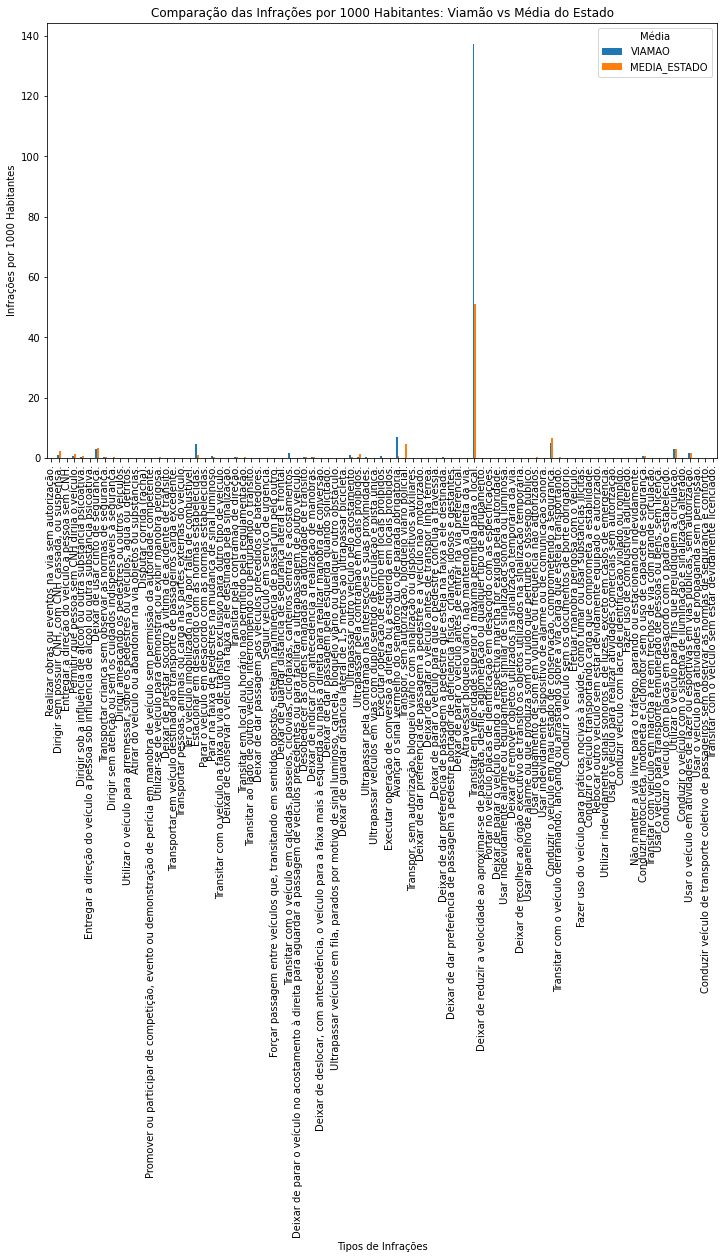

In [17]:
# Gerar gráfico de barras comparando médias de Viamão com o restante do estado
fig, ax = plt.subplots(figsize=(12, 8))

comparativo_viamao_estado[['VIAMAO', 'MEDIA_ESTADO']].plot(kind='bar', ax=ax)
ax.set_title('Comparação das Infrações por 1000 Habitantes: Viamão vs Média do Estado')
ax.set_ylabel('Infrações por 1000 Habitantes')
ax.set_xlabel('Tipos de Infrações')
plt.xticks(rotation=90)
plt.legend(title='Média')
plt.show()

Após essas análises já possível verificar as infrações mais cometidas no município e quais estão acima da média estadual. Também será possível (através da planilha que exportamos) de montar uma visualização para todo estado do Rio Grande do Sul.

Os dados das infrações de trânsito em Viamão no primeiro trimestre de 2024 revelam algumas diferenças significativas quando comparados com a média do estado do Rio Grande do Sul, calculados por 1000 habitantes. A infração mais comum é transitar em velocidade superior à máxima permitida, com uma média de 137.434 infrações, muito acima da média estadual de 50.938, uma diferença de 86.496 infrações. Outras infrações com médias notavelmente superiores incluem avançar o sinal vermelho e estacionar em desacordo com as normas estabelecidas. 

Limitações 
Este estudo apresenta algumas limitações importantes. As infrações analisadas foram aquelas registradas no repositório do Detran-RS, não considerando possíveis registros de empresas públicas municipais. Além disso, a população utilizada para o cálculo foi baseada na estimativa do IBGE de 2021, enquanto os dados das infrações são do primeiro trimestre de 2024. Essas diferenças temporais podem afetar a precisão dos resultados e conclusões. Portanto, recomenda-se cautela ao interpretar esses dados e ao planejar intervenções baseadas neles.